<a href="https://colab.research.google.com/github/dtphuong2612/Machine_Learning_02/blob/main/homework06%3ADBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Implement thuật toán DBScan bằng numpy

In [2]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

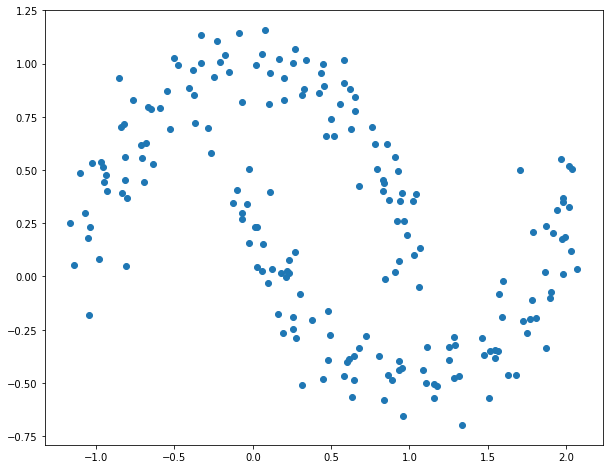

In [4]:
Xmoon, ymoon = make_moons(200, noise=.1, random_state=0)
plt.figure(figsize= (10,8))
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

In [5]:
class MyDBSCAN:
    def __init__(self, radius, min_sample, data):
        self.radius = radius
        self.min_sample = min_sample
        self.data = pd.DataFrame(data, columns=['x', 'y'])
        self.data['visited'] = 0
        self.data['cluster'] = -1

    def get_dist(self, x1, x2):
        return np.sqrt(((x1 - x2) ** 2).sum(axis=0))

    def get_neighbor(self, row):
        distance = self.data[['x', 'y']].apply(lambda x: self.get_dist(x, row[['x', 'y']]), axis=1)
        return list(self.data[distance <= self.radius].index)

    def clustering(self, row_ind, neighbors, cluster):
        self.data.loc[row_ind, 'cluster'] = cluster
        while len(neighbors) > 0:
            nb_ind = neighbors.pop()
            if self.data.loc[nb_ind, 'visited'] == 0:
                self.data.loc[nb_ind, 'visited'] = 1
                nb_neighbors = self.get_neighbor(self.data.loc[nb_ind, :])
                if len(nb_neighbors) >= self.min_sample:
                    neighbors = neighbors + nb_neighbors
            if self.data.loc[nb_ind, 'cluster'] == -1:
                self.data.loc[nb_ind, 'cluster'] = cluster

    def fit(self):
        cluster = 0
        while (self.data['visited'] == 0).sum() > 0:
            row_ind = self.data[self.data['visited'] == 0].index[0]
            self.data.loc[row_ind, 'visited'] = 1
            neighbors = self.get_neighbor(self.data.loc[row_ind, :])
            if len(neighbors) < self.min_sample:
                continue
            else:
                cluster += 1
                self.clustering(row_ind, neighbors, cluster)
        self.labels = self.data['cluster']

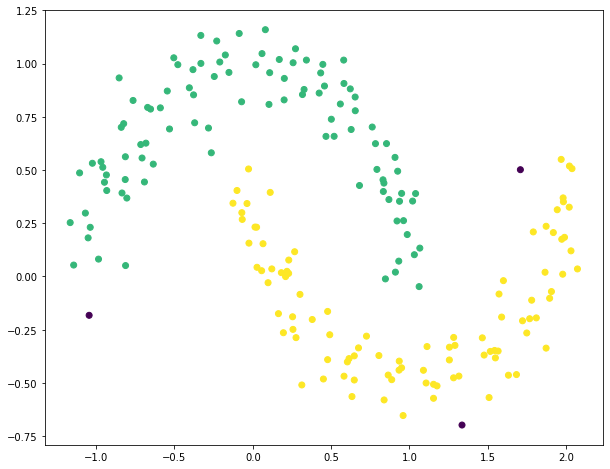

In [7]:
x = MyDBSCAN(0.2, 3, Xmoon)
x.fit()
plt.figure(figsize= (10,8))

plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c = x.labels)

#2: Ý nghĩa của tham số radius, min sample trong thuật toán DBScan. Nếu chỉ số nhỏ, lớn ảnh hưởng thế nào?

Tham số radius: là một giá trị khoảng cách được sử dụng để xã định vùng lân cận radius của bất kỳ điểm dữ liệu nào. \
\
Min sample: là một ngưỡng số điểm dữ liệu tối thiểu được nhóm lại với nhau nhằm xác định một vùng lân cận radius có mật độ cao. Số lượng min sample không bao gồm điểm ở tâm.\
\
Nếu radius được chọn quá nhở, phần lớn dữ liệu sẽ không được phân cụm và được xem là nhiễu, trong khi đối với giá trị radius quá cao, các cụm sẽ hợp nhất và phần lớn các điểm sẽ nằm trong cùng một cụm.\
\
Nếu min sample thấp có nghĩa là nó sẽ xây dựng nhiều cụm từ tiếng ồn ( min sample ít nhất là 3), trong khi min sample cao có nghĩa nó có thể bao gồm tất cả các điểm trong tập dữ liệu ( nên chọn min sample = 2*dim, dim là chiều của dữ liệu, còn đối với dữ liệu hai chiều nên chọn min sample = 4)



#3: So sánh ba thuật toán : kmean, GMM, DBScan. Khi nào nên sử dụng thuật toán nào? Cho ví dụ?

#K-mean


Pros: \
+) Quickest centroid based algorithm\
+) Very lucid and can scale up for large amount of dataset\
+) Reduces intra-cluster variance measure\
\
Cons:\
+) Suffers when there is noise in the data\
+) Outliers can never be identified\
+) Even though it reduces intra-cluster variance, it faces local mimimum problem\
+) Not ideal for datasets of non-convex shapes\
+) Complicated to predict best K value\
\
Use cases:\
Even cluster size, flat geometry, not too many clusters and general-purpose\
\
Example:\
+)Segmentation of customers in business\
+) Image segmentation\
+) Genetic analysis in medicine\
+) Anomaly detection.\





#GMM


Pros:\
+) Robust to outliers\
+) Provides the BIC score for selecting parameters\
+) Converges fast given good initialization\
\
Cons:\
The algorithm is highly complex and can be slow\
\
Use cases:\
Good for density estimation and flat geometry\
\
Example:\
+) Clustering of homogeneous bacterial colonies to estimate their size\

#DBScan

Pros:\
+) Resistant to outliers\
+) Can handle clusters of different shapes and sizes\
+) Not required to specify the number of cluster\
\
Cons:\
+) Highly sensitive to the two-parameters: Radius and Min sample\
+) DBSCAN cannot cluster datasets well with large variances in densities\
\
Use cases:\
Uneven cluster sizes and non-flat geometry\
\
Example:\
+) Face clustering\